# Importing Libraries:

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Import Dataset:

In [24]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('car.csv')

# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [25]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [26]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# PreProccessing of Data:

In [27]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [28]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


<AxesSubplot: xlabel='Fuel_Type', ylabel='count'>

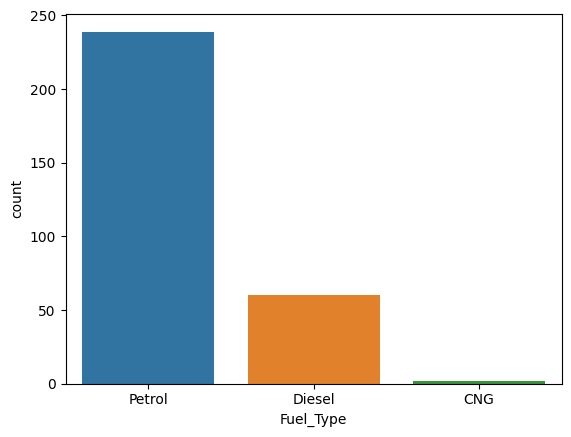

In [29]:
 #sns.countplot >> calculate value_counts
sns.countplot(x=car_dataset.Fuel_Type)  

# Insight
 <h3>Most cars use Petrol as a Fuel ,then Diesel.</h3>

<AxesSubplot: xlabel='Seller_Type', ylabel='count'>

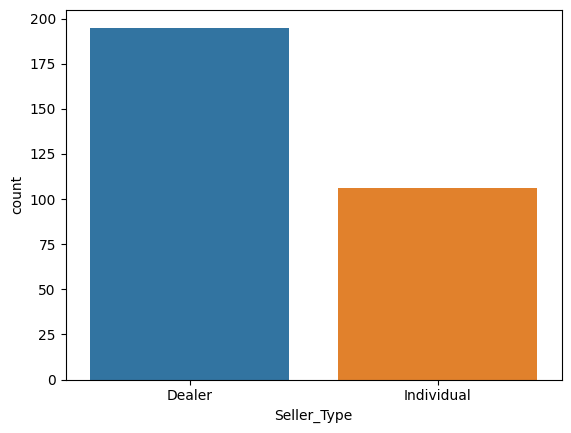

In [30]:
sns.countplot(x=car_dataset.Seller_Type)

# insight:
 <h4>There are two types of sellers:</h4>
 <ul>
    <li>Dealers</li>
    <li>Individuals</li>
</ul>
the dealers are the most common and thier number is twice the number of individuals.

<AxesSubplot: xlabel='count', ylabel='Year'>

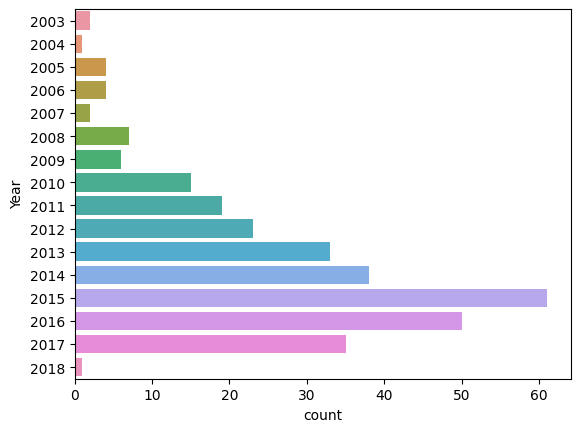

In [31]:
sns.countplot(y=car_dataset.Year)

# insight:
 <h4>Most cars are from model 2010 and higher</h4>

<AxesSubplot: xlabel='count', ylabel='Year'>

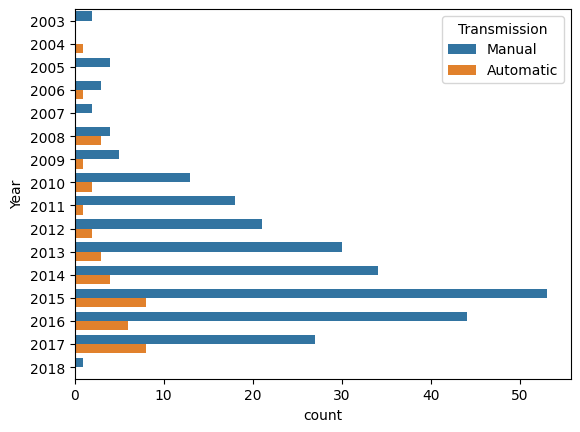

In [32]:
sns.countplot(y ='Year', hue = "Transmission", data = car_dataset)

# insight:
 <h4>Despite the great development nowadays,<br> the mauel cars industry is still much larger than the automatic cars to suit the needs of the market.</h4>

<AxesSubplot: xlabel='count', ylabel='Year'>

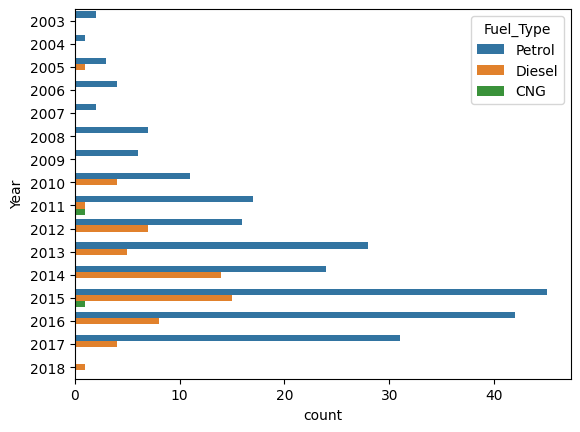

In [33]:
sns.countplot(y ='Year', hue = "Fuel_Type", data = car_dataset)

# insight:
 <h4>Using Diesel fuel is in increasing from 2010.</h4>

In [35]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


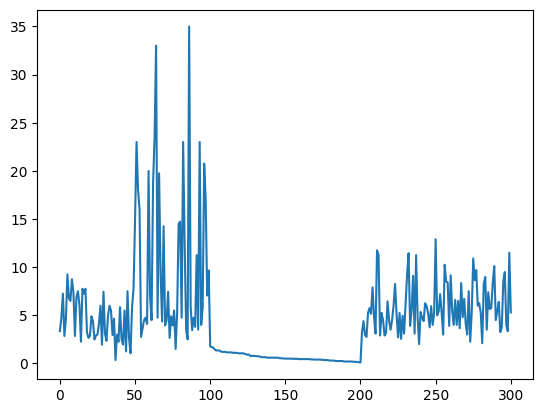

In [34]:
plt.plot(car_dataset.Selling_Price)

<AxesSubplot: xlabel='Present_Price'>

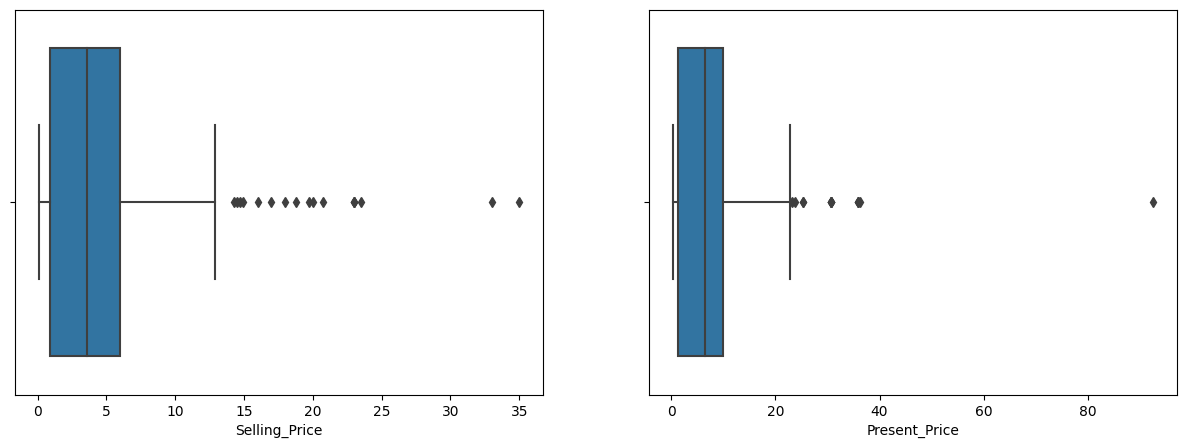

In [36]:
plt.figure(figsize = (15,5))
plt.subplot(121)
sns.boxplot(x=car_dataset['Selling_Price'])
plt.subplot(122)
sns.boxplot(x=car_dataset['Present_Price'])

# Feature Engineering:

In [7]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [8]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [9]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

# Spliting Data:

In [10]:
#Splitting Training and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

# Model Training:

In [11]:
#Model Training
#################################### loading the linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [12]:

# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

# evaluation
training_error = lin_reg_model.score(X_train, Y_train)
print('Training Error: ',training_error)

Training Error:  0.8799451660493708


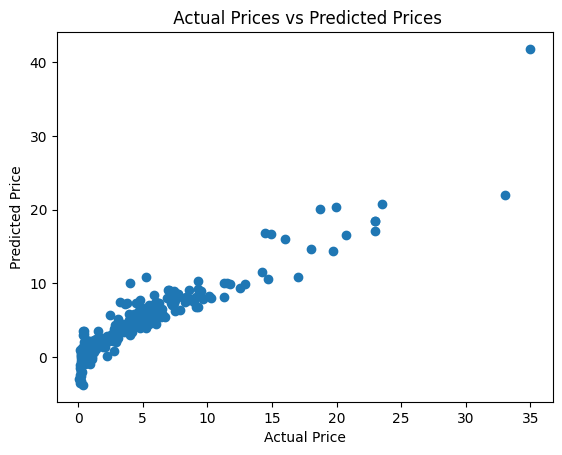

In [13]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [14]:

# prediction on Testing data
test_data_prediction = lin_reg_model.predict(X_test)

# evaluation
testing_error = lin_reg_model.score(X_test, Y_test)
print('Testing Error: ',testing_error)

Testing Error:  0.8365766715026374


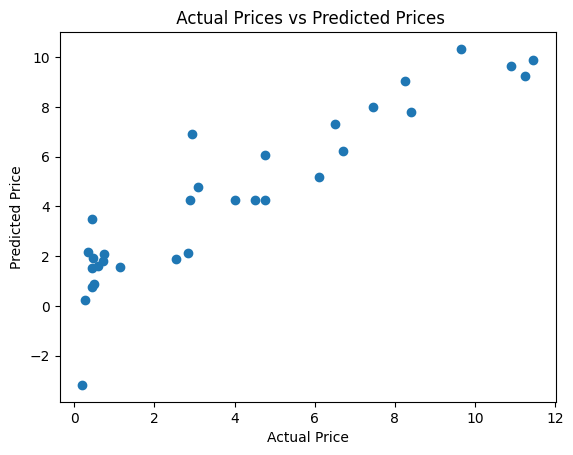

In [15]:

plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()